In [ ]:
import torch
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    accuracy_score,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import random
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, FeaturesData
import plotly.express as px
import warnings

from ultralytics import YOLO
import cv2

In [ ]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [ ]:
pd.concat([train_df, test_df]).sort_values(by="FolderName").head(30)

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
217,ID_834002_Jhc8iv,A2miww5mfx,2,L,10,23,4.2,IITA-TMS-IBA000070,Late
0,ID_826322_Lbmaya,A6dzrkjqvl,3,L,33,42,0.9,IITA-TMS-IBA000070,Early
221,ID_862682_Lypcug,A6dzrkjqvl,6,L,33,42,0.1,IITA-TMS-IBA000070,Early
118,ID_526113_Y4b17u,A6dzrkjqvl,4,L,33,42,1.8,IITA-TMS-IBA000070,Early
102,ID_815338_Zqmjqz,A6dzrkjqvl,5,L,33,42,NaN,IITA-TMS-IBA000070,Early
57,ID_752130_Cnfgmz,A6dzrkjqvl,2,L,33,42,NaN,IITA-TMS-IBA000070,Early
97,ID_755935_Bzrkjq,Aevcaxguiw,2,L,8,16,4.2,IITA-TMS-IBA000070,Late
36,ID_677302_Zjlged,Ah4ubi4ggi,4,L,42,49,0.8,IITA-TMS-IBA000070,Early
107,ID_225072_B3txqy,Ah4ubi4ggi,3,R,27,44,3.1,IITA-TMS-IBA000070,Early
20,ID_389935_Wf0rvu,Ah4ubi4ggi,5,R,27,44,2.3,IITA-TMS-IBA000070,Early


# Viewing Image


In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = "data/train/A6dzrkjqvl/A6dzrkjqvl_L_036.png"
# Step 1: Load the image

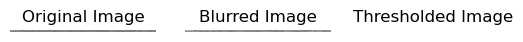

In [ ]:
# Step 1: Load the image
image = cv2.imread(
    img_path, cv2.IMREAD_GRAYSCALE
)  # Make sure to replace with your image file path

# Step 2: Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 3: Apply Thresholding
threshold_value = 100
_, thresholded_image = cv2.threshold(
    blurred_image, threshold_value, 255, cv2.THRESH_BINARY
)

# Step 4: Save the images
# cv2.imwrite('random_tests/abcd/original_image.png', image)  # Save the original image
# cv2.imwrite('random_tests/abcd/blurred_image.png', blurred_image)  # Save the blurred image
# cv2.imwrite('random_tests/abcd/thresholded_image.png', thresholded_image)  # Save the thresholded image

# Display the images
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Thresholded Image")
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
x = train_df.drop(columns=["ID", "RootVolume", "Side", "Start", "End"])
y = train_df["RootVolume"]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

cb_params = {
    "iterations": 5000,
    "early_stopping_rounds": 1500,
    "learning_rate": 0.05,
    "loss_function": "RMSE",
    "depth": 1,
    # 'l2_leaf_reg': 8,
    # 'bagging_temperature': 2,
    # 'random_strength': 1,
    # 'border_count': 63,
    # 'od_type': 'IncToDec',
    "verbose": 100,
    # 'subsample': 1.0,
    # 'random_seed': 42,
    "task_type": "CPU",
}

cb_model = CatBoostRegressor(
    **cb_params, cat_features=["FolderName", "Genotype", "Stage"]
)

cb_model.fit(x_train, y_train, eval_set=(x_valid, y_valid))

In [ ]:
valid_preds = cb_model.predict(x_valid)
mean_absolute_error(y_valid, valid_preds), np.sqrt(
    mean_squared_error(y_valid, valid_preds)
)

(0.8702204172209386, 1.1976147647291289)

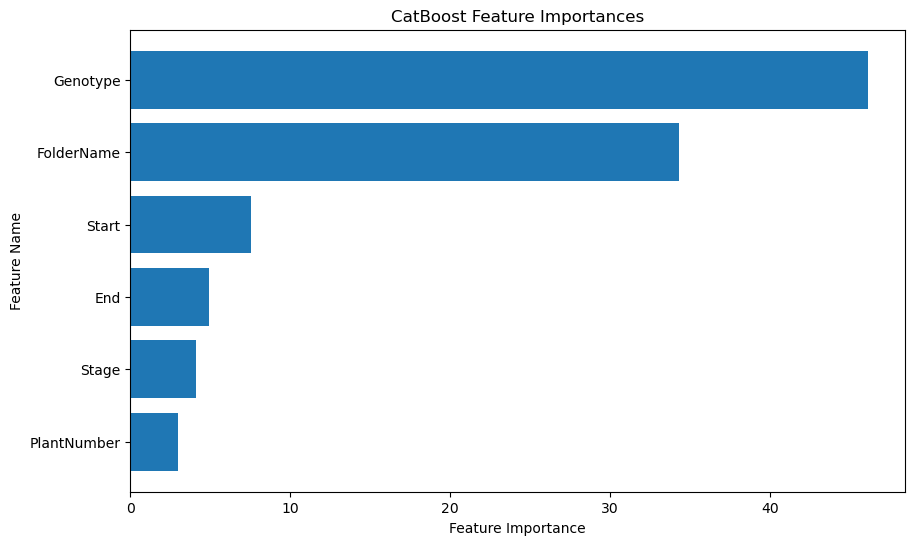

In [ ]:
importances = cb_model.get_feature_importance()
feature_names = x_train.columns  # Assuming X_train is a pandas DataFrame

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align="center")
plt.yticks(range(len(importances)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("CatBoost Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

In [ ]:
test_preds = cb_model.predict(test_df.drop(columns=["ID", "Side", "Start", "End"]))
test_preds

array([     1.8786,      2.0374,      2.7877,      1.8925,       1.958,      2.9214,      2.2716,       1.345,      2.0516,      1.4269,      1.6373,      1.7635,      1.0661,      1.8825,      1.5431,      1.7507,     0.98413,      1.8118,      2.1238,      2.7877,      1.9891,       1.418,      2.1602,       1.543,
            1.1375,      2.4752,      1.5431,      1.5431,      2.6756,      1.6698,     0.44477,      2.6382,      1.3708,      2.3777,      2.1567,      1.9578,      2.6008,      1.4267,      2.2714,      2.7876,      2.3022,      2.5253,      2.6754,      2.4655,      1.0042,      1.8967,      1.4011,      2.0517,
            2.5253,      1.9891,      1.5261,      2.7877,      2.6532,      1.7155,       2.227,      2.4822,      1.2275,       1.628,      2.7288,      2.0528,      1.9012,      1.6421,       1.543,       1.066,     0.89662,      3.0176,       2.242,       1.418,      1.8353,      1.5707,      2.0529,      3.1745,
            1.5719,      2.9987,      1.543

In [ ]:
submission_df = pd.DataFrame({"ID": test_df["ID"], "RootVolume": test_preds})

submission_df

,ID,RootVolume
0,ID_208667_Hnkl8q,1.878562
1,ID_285249_Jnjvav,2.037449
2,ID_697947_Yec6bd,2.787729
3,ID_534638_X3j91f,1.892513
4,ID_929298_Xvymuz,1.957957
...,...,...
125,ID_652025_Ecubfg,2.760164
126,ID_456856_Iucagp,0.984133
127,ID_163551_Alfdb5,1.777214
128,ID_947929_Qsuqln,1.892393


In [ ]:
submission_df.to_csv("submission.csv", index=False)